In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    plt.style.use('ggplot')
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)
    


In [15]:
df = read_and_preprocess("hospital_beds_data.csv", [], ["2010", "2015"])

In [16]:
find_country_to_maximize_column(df, "2015")

52    Czech Republic
Name: Country Name, dtype: object

In [17]:
find_country_to_minimize_column(df, "2015")

1    Afghanistan
Name: Country Name, dtype: object

0


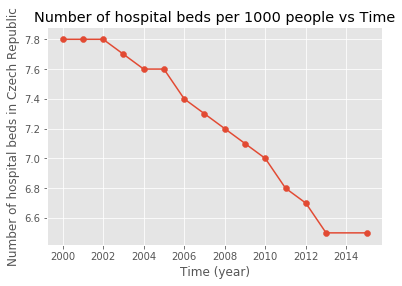

In [22]:
plot_country_data(df, "Czech Republic", False, True, 2000, 2015, [2014], "Number of hospital beds per 1000 people vs Time", "Time (year)", "Number of hospital beds in Czech Republic", "czech.png")


0


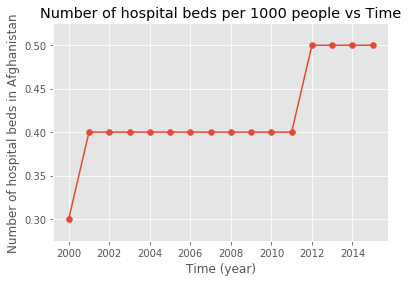

In [24]:
plot_country_data(df, "Afghanistan", False, True, 2000, 2015, [], "Number of hospital beds per 1000 people vs Time", "Time (year)", "Number of hospital beds in Afghanistan", "afgh.png")


In [26]:
find_fastest_growing_region(df, "2010", "2015")

Inclines: Afghanistan
Inclines: Armenia
Inclines: Costa Rica
Inclines: Croatia
Inclines: Indonesia
Inclines: Kiribati
Inclines: Malaysia
Inclines: Tunisia


(0.11999999999997253, 'Indonesia')

2


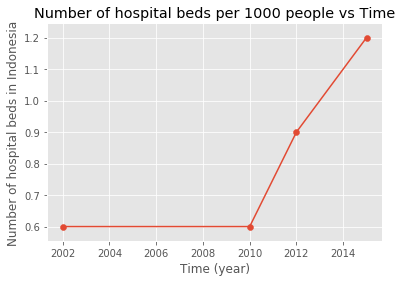

In [30]:
plot_country_data(df, "Indonesia", False, True, 2000, 2015, [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2011, 2013, 2014], "Number of hospital beds per 1000 people vs Time", "Time (year)", "Number of hospital beds in Indonesia", "indo.png")


In [31]:
find_fastest_declining_region(df, "2010", "2015")

Declines: Czech Republic
Declines: Denmark
Declines: Estonia
Declines: Finland
Declines: Greece
Declines: Jordan
Declines: Cambodia
Declines: Luxembourg
Declines: Mexico
Declines: Slovak Republic


(-0.2999999999999313, 'Finland')

0


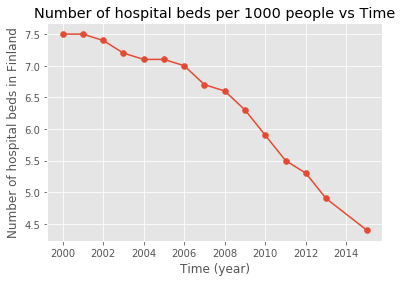

In [33]:
plot_country_data(df, "Finland", False, True, 2000, 2015, [2014], "Number of hospital beds per 1000 people vs Time", "Time (year)", "Number of hospital beds in Finland", "fin.png")
